In [10]:
import pandas as pd
import datetime as dt
import string
import seaborn
import matplotlib.pyplot as plt
from seaborn.categorical import barplot

In [21]:
data = pandas.read_csv('energy_use_in_the_UK.csv', sep=' ;')
data.columns

# le tableau contient une unique colonne ce qui empeche de traiter les données, on définit donc un séparateur


,timestamp,coal,nuclear,wind,hydro,solar
0,2012-01-01 00:00:01,8693,7121,2740,728,0.0
1,2012-01-01 00:05:06,8650,7120,2812,732,0.0
2,2012-01-01 00:10:01,8880,7125,2896,744,0.0
3,2012-01-01 00:15:01,9111,7122,2964,748,0.0
4,2012-01-01 00:20:01,9195,7114,2992,750,0.0


<AxesSubplot:>

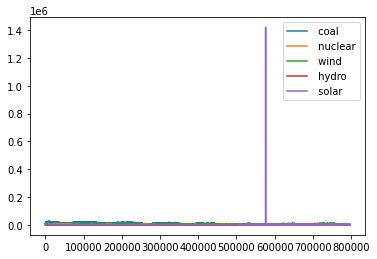

In [19]:
# On affiche le graph
data.plot()

In [46]:
# le nom de toutes les colonnes possède un espace au debut des colonnes, on va s'en debarasser

data = data.rename(columns={" timestamp": "timestamp", " coal": "coal"," nuclear": "nuclear"," wind": "wind"," hydro": "hydro"," solar": "solar"})

In [50]:
# On split le timestamp en Jours et Heures
data['date'] = pd.to_datetime(data['timestamp']).dt.date
data['time'] = pd.to_datetime(data['timestamp']).dt.time

In [ ]:
# On extrapole les données manquantes


In [59]:
# On somme l'énergie totale journalière
daily = data.groupby(by=['date']).sum()
print(daily)

               coal  nuclear     wind   hydro          solar
date                                                        
2012-01-01  2448325  2029537   760388  226484       0.000000
2012-01-02  2928449  2030808   792769  223223       0.000000
2012-01-03  4430877  2005847   621916  231623       0.000000
2012-01-04  4903744  2039013   764407  232221       0.000000
2012-01-05  4765032  2171748   760181  238301       0.000000
...             ...      ...      ...     ...            ...
2019-07-30        0  1573999  1233718   73637  376435.335097
2019-07-31        0  1606865  1685585   92945  355390.763997
2019-08-01        0  1606940   650512  117124  519328.582901
2019-08-02        0  1592180   295905  115334  596295.099905
2019-08-03        0  1322450   155671   76132  512386.252999

[2772 rows x 5 columns]


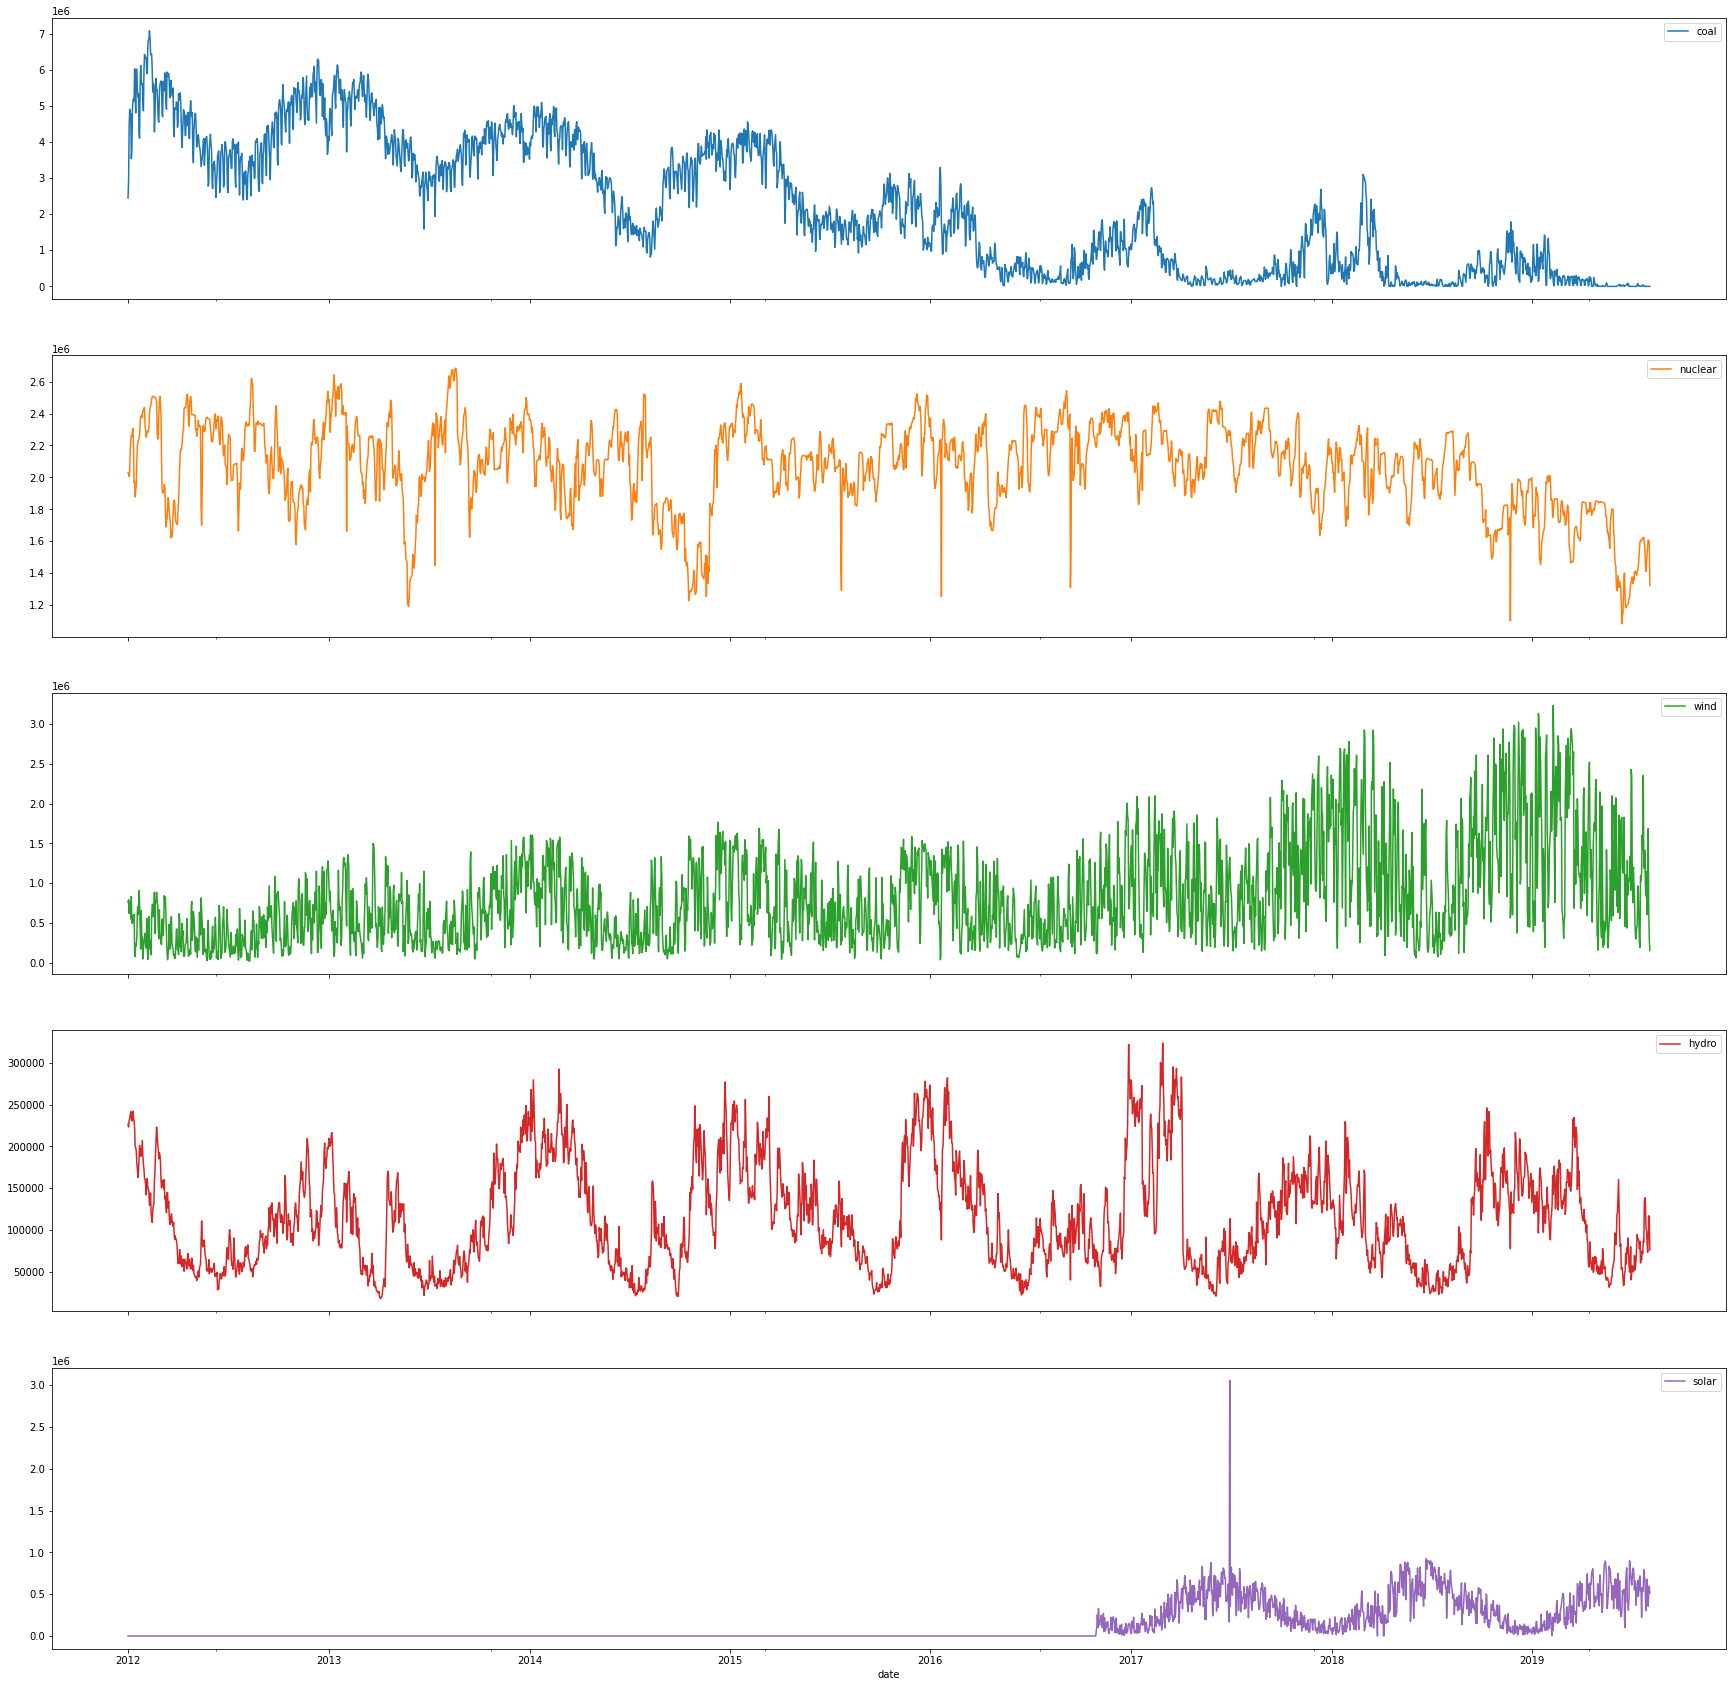

In [62]:
# On choisit la bonne représentation
daily.plot(subplots=True, figsize=(30, 30));